# Heart Disease Patients Classification

## Contents

I. [Introduction](#1)

II. [The Data](#2)

![heart](https://archive.ics.uci.edu/ml/assets/MLimages/Large45.jpg)

## I. Introduction <a id='1'></a>

There have been lots of research on heart disease. As now we can see that several factors can affect: **high cholesterol, high blood pressure, diabetes, weight, family history and smoking**. Also some major factors that can't be changed are: **increasing age, male gender and heredity**.

In this project, we'll use the [Heart Disease Data Set](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) from UCI, which contains 303 observations and some of them are heart disease patients. We'll use KNN and logistic regression model to predict if people would get heart disease.

## II. Data Preparation <a id='2'></a>

Now, let's load some necessery packages and dataset.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
%matplotlib inline

In [27]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,

- **age**: The person's age in years
- **sex**: The person's sex (1 = male, 0 = female)
- **cp:** The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- **trestbps:** The person's resting blood pressure (mm Hg on admission to the hospital)
- **chol:** The person's cholesterol measurement in mg/dl
- **fbs:** The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false) 
- **restecg:** Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- **thalach:** The person's maximum heart rate achieved
- **exang:** Exercise induced angina (1 = yes; 0 = no)
- **oldpeak:** ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more [here](https://litfl.com/st-segment-ecg-library/))
- **slope:** the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- **ca:** The number of major vessels (0-3)
- **thal:** A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- **target:** Heart disease (0 = no, 1 = yes)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.shape

(303, 14)

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


So this dataset has 303 observations and 14 columns. Then we'll draw some plots to see if there are any obvious patterns.

## III. Data Visualization <a id='3'></a>

Except dependent variable "target", we got 13 predictors, in which 4 are continuous and 9 are categorical. Now let's draw a pair plot on these continuous variables.

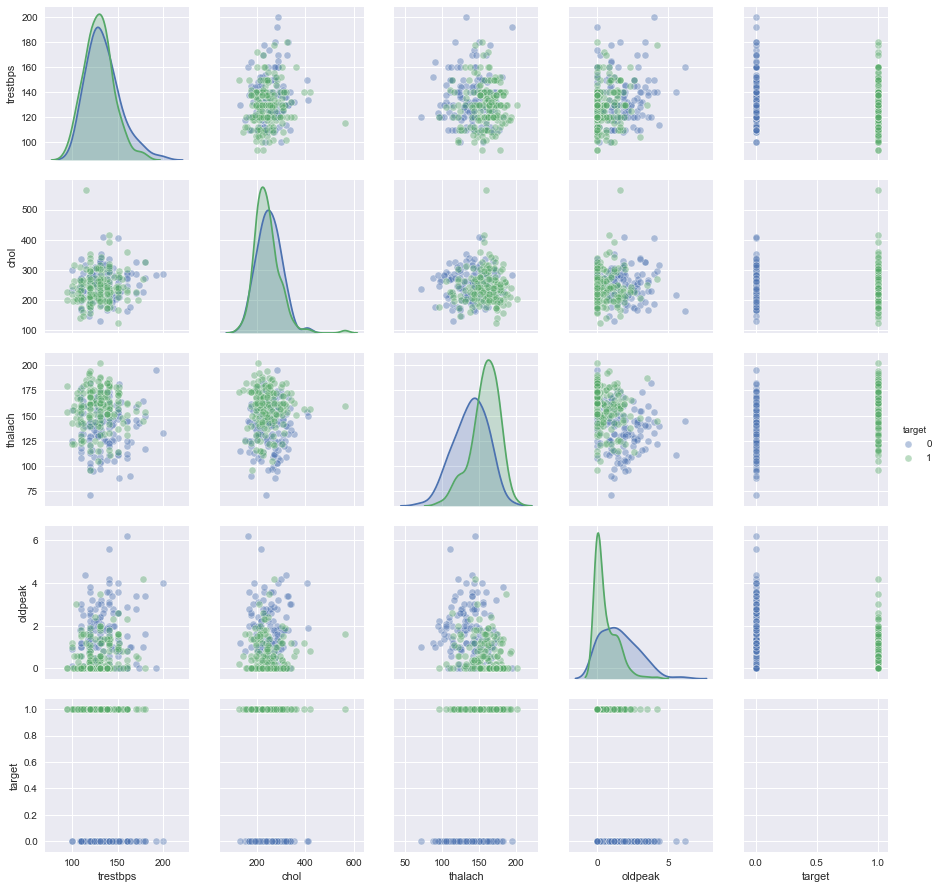

In [30]:
sns.pairplot(df[['trestbps', 'chol', 'thalach', 'oldpeak', 'target']] , hue='target', plot_kws={'alpha':0.4});

We can see a significant pattern that as **thalach**(The person's maximum heart rate achieved) higher, it's more likely to get heart disease; and as the **oldpeak** less, also more likely to get heart disease.

In [8]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


About **age**, it's little abnormal that the ratio caught heart disease in older people is slightly lower than younger people. The average age of patients is 52.5, at same time the average age of non-patients is 56.6.

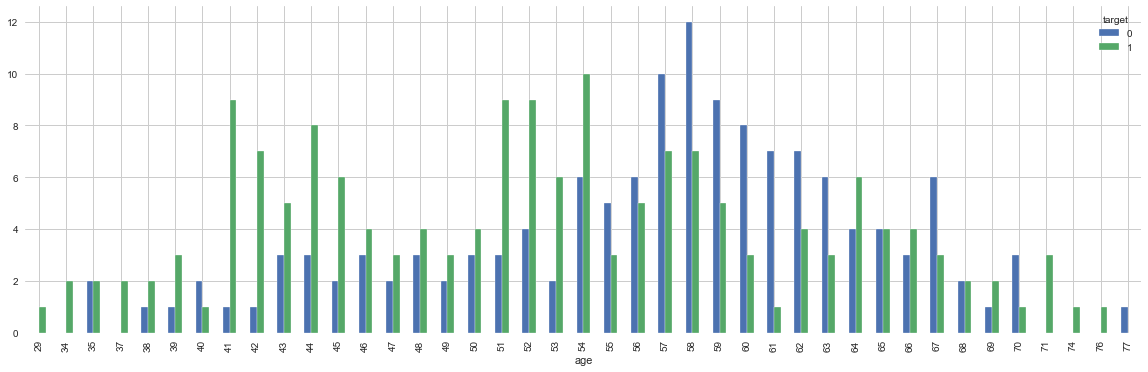

In [31]:
sns.set_style('whitegrid')

pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))


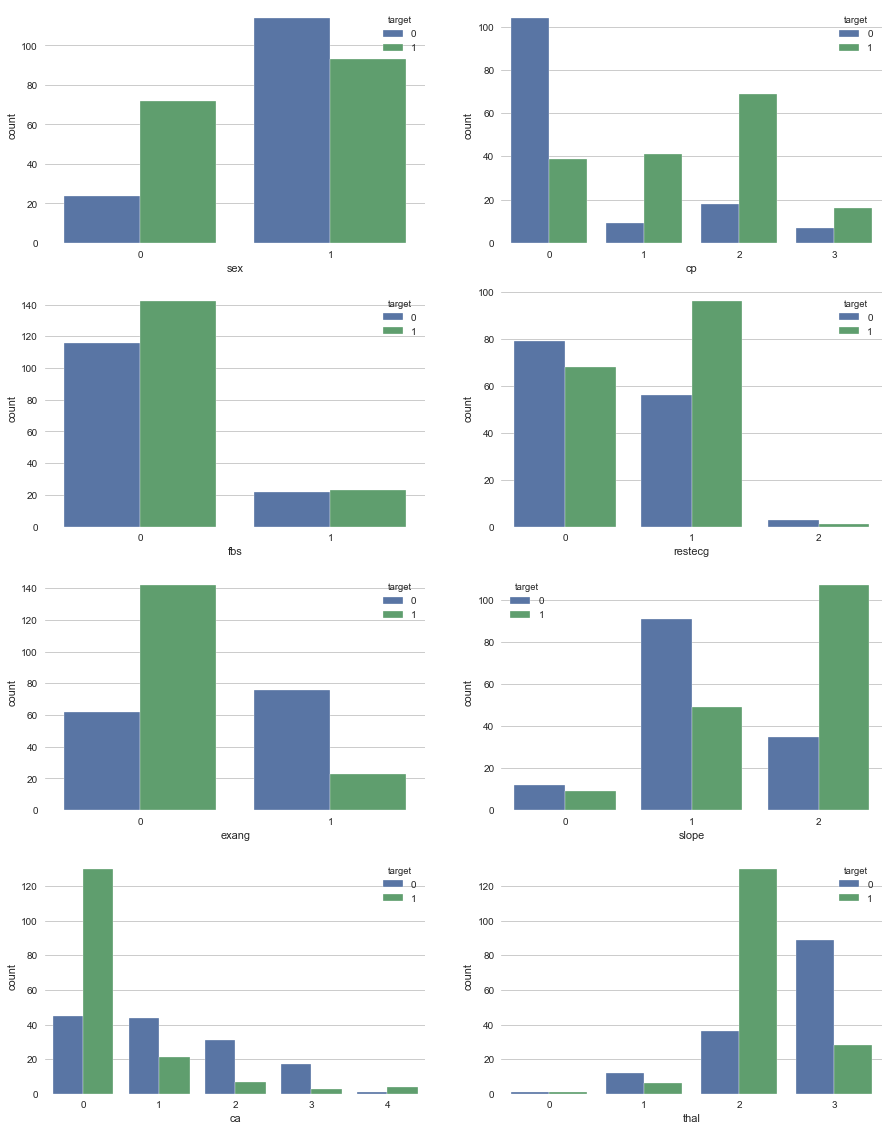

In [10]:
f, axes = plt.subplots(4, 2, sharex=False, sharey=False) 
f.set_figheight(20)
f.set_figwidth(15)
sns.countplot(x='sex', data=df, hue='target', ax=axes[0,0])
sns.countplot(x='cp', data=df, hue='target', ax=axes[0,1])
sns.countplot(x='fbs', data=df, hue='target', ax=axes[1,0])
sns.countplot(x='restecg', data=df, hue='target', ax=axes[1,1])
sns.countplot(x='exang', data=df, hue='target', ax=axes[2,0])
sns.countplot(x='slope', data=df, hue='target', ax=axes[2,1])
sns.countplot(x='ca', data=df, hue='target', ax=axes[3,0])
sns.countplot(x='thal', data=df, hue='target', ax=axes[3,1])

## IV. Data Modeling <a id='4'></a>

First we'll split the whole dataset into training and test, and scale all the features.

In [32]:
X = df.drop('target', axis=1)
y = df.target

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

### 4.1 K-Nearest Neighbors <a id='4.1'></a>

Firstly we'll try KNN and choose a best parameter for 'n'

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn =KNeighborsClassifier()
params = {'n_neighbors':[i for i in range(1,33,2)]}
model = GridSearchCV(knn,params,cv=10)
model.fit(X_train,y_train)
model.best_params_     

{'n_neighbors': 17}

In [14]:
predict = model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,predict)

0.8461538461538461

In [15]:
confusion_matrix(y_test,predict)

array([[32,  9],
       [ 5, 45]], dtype=int64)

In [16]:
from sklearn.metrics import roc_auc_score,roc_curve

#Get predicted probabilites from the model
y_probabilities = model.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_knn,true_positive_rate_knn,threshold_knn = roc_curve(y_test,y_probabilities)

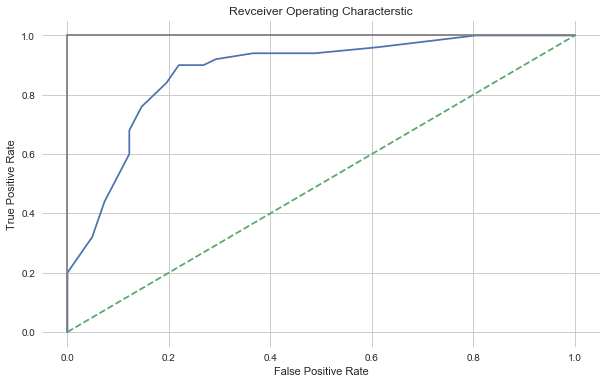

In [17]:
#Plot ROC Curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_knn,true_positive_rate_knn)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [18]:
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8760975609756096

In [19]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [20]:
# Setting parameters for GridSearchCV
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
log_model = GridSearchCV(log,param_grid=params,cv=10)

log_model.fit(X_train,y_train)

# Printing best parameters choosen through GridSearchCV
log_model.best_params_

C:\Users\MP1D7R47\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'}

In [21]:
predict = log_model.predict(X_test)

accuracy_score(y_test,predict)

0.8241758241758241

In [22]:
 confusion_matrix(y_test,predict)

array([[33,  8],
       [ 8, 42]], dtype=int64)

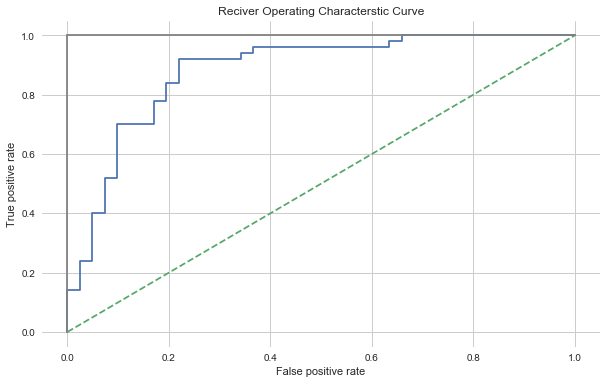

In [23]:
#Get predicted probabilites
target_probailities_log = log_model.predict_proba(X_test)[:,1]

#Create true and false positive rates
log_false_positive_rate,log_true_positive_rate,log_threshold = roc_curve(y_test,target_probailities_log)

#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(log_false_positive_rate,log_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [24]:
#Calculate area under the curve
roc_auc_score(y_test,target_probailities_log)

0.8804878048780488

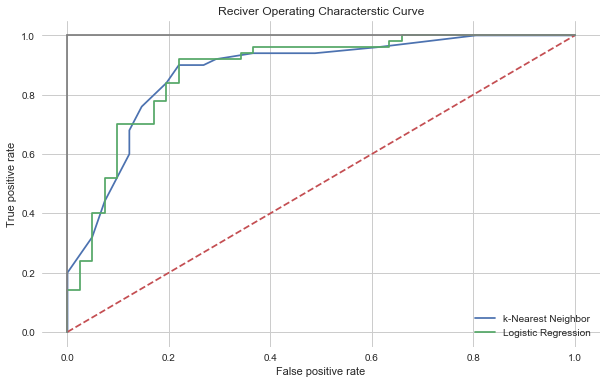

In [25]:
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(false_positive_rate_knn,true_positive_rate_knn,label='k-Nearest Neighbor')
plt.plot(log_false_positive_rate,log_true_positive_rate,label='Logistic Regression')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()